In [1]:
import sys
import numpy as np 
import pandas as pd
from os.path import expanduser

# Add path to folder containing safepy

import safe

%matplotlib inline

In [2]:
sf = safe.SAFE()

In [3]:
sf.load_network(network_file='../../data/safe-data/networks/Costanzo_Science_2016.gpickle')

Loading network from ../../data/safe-data/networks/Costanzo_Science_2016.gpickle


Output path: ../../results/09_SAFE/GIN_mapping/Costanzo_Science_2016_GIN.pdf


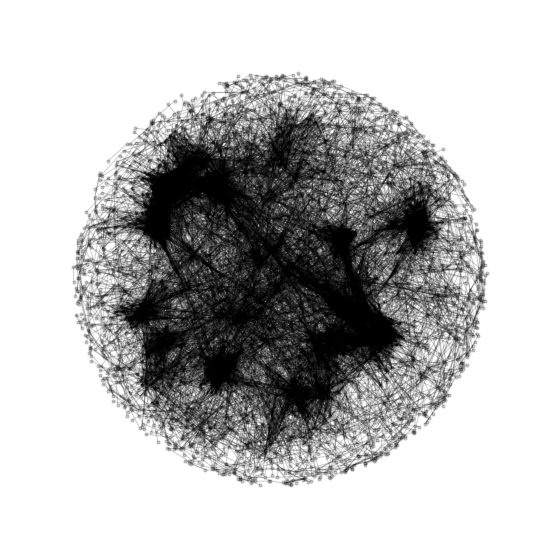

In [4]:
sf.plot_network()

In [6]:
all_piQTLs_ERG11_ORM2 = pd.read_csv('../../data/safe-data/attributes/ERG11_ORM2_Fluconazole.txt', names=['piQTL', 'p-value'], sep='\t')

In [ ]:
PPI_label ='ERG11:ORM2'
DRUG ='Fluconazole'
sf.plot_network_for_piQTLs('#ffffff', PPI_label=PPI_label, DRUG=DRUG, PPI=['YHR007C', 'YLR350W'], piQTLs=list(all_piQTLs_ERG11_ORM2['piQTL'].values), save_fig=f'../../results/GIN_mapping/{PPI_label}_{DRUG}_piQTLs_on_GIN.pdf')

In [9]:
all_piQTLs_Fluconazole = pd.read_csv('../../data/safe-data/attributes/all_piQTLs_Fluconazole.txt', sep='\t')
all_piQTLs_5FC = pd.read_csv('../../data/safe-data/attributes/all_piQTLs_5_FC.txt', sep='\t')
all_piQTLs_Metformin = pd.read_csv('../../data/safe-data/attributes/all_piQTLs_Metformin.txt', sep='\t')
all_piQTLs_Trifluoperazine = pd.read_csv('../../data/safe-data/attributes/all_piQTLs_Trifluoperazine.txt', sep='\t')

In [12]:
all_piQTLs_Fluconazole

,locus_id,Fluconazole
0,YGL014W,9.075840e-10
1,YGL013C,1.797591e-08
2,SUT153,2.613069e-08
3,YGL015C,8.695099e-08
4,YGL017W,5.952823e-07
...,...,...
97,YER066W,3.705386e-02
98,YDR314C,3.988091e-02
99,YHL024W,1.212698e-02
100,YPR160W,4.024118e-02


In [ ]:
DRUG='Fluconazole'
sf.plot_network_for_piQTLs('#ffffff', PPI_label='', DRUG=DRUG, PPI=list(), piQTLs=list(all_piQTLs_Fluconazole['locus_id'].values), save_fig=f'../../results/09_SAFE/GIN_mapping/{DRUG}_piQTLs_on_GIN.pdf')

In [ ]:
DRUG='5-FC'
sf.plot_network_for_piQTLs('#ffffff', PPI_label='', DRUG=DRUG, PPI=list(), piQTLs=list(all_piQTLs_5FC['locus_id'].values), save_fig=f'../../results/09_SAFE/GIN_mapping/{DRUG}_piQTLs_on_GIN.pdf')

In [ ]:
DRUG='Metformin'
sf.plot_network_for_piQTLs('#ffffff', PPI_label='', DRUG=DRUG, PPI=list(), piQTLs=list(all_piQTLs_Metformin['locus_id'].values), save_fig=f'../../results/09_SAFE/GIN_mapping/{DRUG}_piQTLs_on_GIN.pdf')

In [ ]:
DRUG='Trifluoperazine'
sf.plot_network_for_piQTLs('#ffffff', PPI_label='', DRUG=DRUG, PPI=list(), piQTLs=list(all_piQTLs_Trifluoperazine['locus_id'].values), save_fig=f'../../results/09_SAFE/GIN_mapping/{DRUG}_piQTLs_on_GIN.pdf')

In [ ]:
def get_chr(x, gene_loc):
    try : 
        return gene_loc[gene_loc['Gene'] == x]['Chromosome_Name'].values[0].replace('CHR', '')
    except : 
        return np.nan

def get_locus(x, gene_loc):
    try : 
        return gene_loc[gene_loc['Gene'] == x]['Locus'].values[0]
    except:
        return np.nan

PPI_reporters = pd.read_csv('../../data/pipeline/PPI_reference_barcodes.csv')
gene_loc = pd.read_csv('../../data/genome_annotations/genes_by_strain/S288C_genes.csv')

PPI_reporters['PPI_bait'] =  [ PPI_reporters['PPI'][idx].split('_')[0] for idx in PPI_reporters.index ]
PPI_reporters['PPI_prey'] =  [ PPI_reporters['PPI'][idx].split('_')[1] for idx in PPI_reporters.index ]

PPI_reporters['CHR_bait'] = PPI_reporters['PPI_bait'].apply(get_chr, args=(gene_loc,))
PPI_reporters['CHR_prey'] = PPI_reporters['PPI_prey'].apply(get_chr, args=(gene_loc,))

PPI_reporters['Locus_bait'] = PPI_reporters['PPI_bait'].apply(get_locus, args=(gene_loc,))
PPI_reporters['Locus_prey'] = PPI_reporters['PPI_prey'].apply(get_locus, args=(gene_loc,))

In [ ]:
PPI_reporters

In [ ]:
import networkx as nx

In [ ]:
PPI_prey = np.array([ prey for prey in PPI_reporters['Locus_prey'].dropna().unique() ])

PPI_bait = np.array([ bait for bait in PPI_reporters['Locus_bait'].dropna().unique() ])

PPI_locus_reporters = []

for i in range(len(PPI_prey)):
    PPI_locus_reporters.append(PPI_prey[i])
for i in range(len(PPI_bait)):        
    PPI_locus_reporters.append(PPI_bait[i])

In [ ]:
len(set(PPI_locus_reporters))

In [ ]:
DRUG=''
sf.plot_network_for_piQTLs('#ffffff', PPI_label='', DRUG=DRUG, PPI=list(), piQTLs=set(PPI_locus_reporters), save_fig=f'../../results/GIN_mapping/PPI_reporters_on_GIN.pdf')